## Predicting the customer churn rate using machine learning 

In this notebook  we are going to go through an end_to_end problem of trying to predict whether customers will either leave or continue using the service of a certain company or they will leave according to the services that we offer to them

### Problem definition

How well can we predict the customer churn rate of a company given the features  and variables(Dependent and the independent features) and past examples of how either the customer left a company or stayed based on the services the company offered to them

### Data :
The data were working with has been provided to us by kaggle https://www.kaggle.com/code/semihizinli/churn-telecom-project... the dataset contains 100 columns and a total of 100000 rows which are pretty enough to predict whether customers will either churn or not 

### Evaluation

We shall use our metrics as accuracy to measure the how well our model perfoms 


**Note:**The goal for any accuracy model is to make sure that the models acccuracy on the validation dataset is high so that the model can perfom well not only on the training dataset but also on the test dataset after deployment and production


## Standard imports 

In [1]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import the dataset
df=pd.read_csv("Telecom_customer churn.csv")
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,Y,U,Y,773.0,1099996
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,N,U,U,Y,Y,Y,Y,835.0,1099997
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,U,Y,Y,U,U,U,N,433.0,1099998
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,U,U,N,75.0,1099999


###  Exploratory data analysis
This is the process where the data scientists tries to familiarize himself with the dataset in hand


In [3]:
#check the mssing values 
df.isna().sum()

rev_Mean        357
mou_Mean        357
totmrc_Mean     357
da_Mean         357
ovrmou_Mean     357
               ... 
kid11_15       1732
kid16_17       1732
creditcd       1732
eqpdays           1
Customer_ID       0
Length: 100, dtype: int64

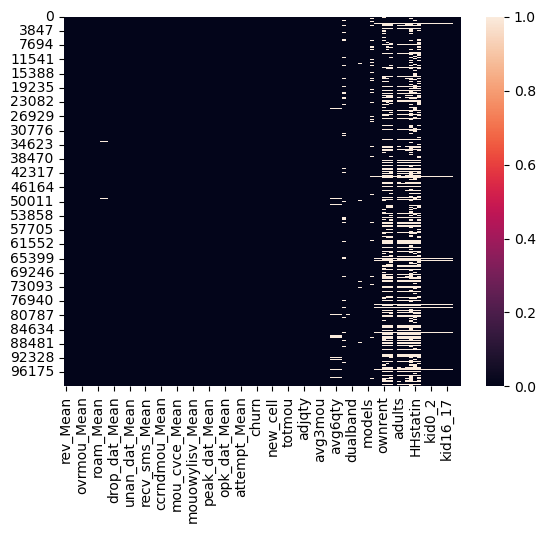

In [4]:
#visualization of the columns with the missing values
sns.heatmap(df.isna());

In [5]:
#check the statistical distribution of the dataset
df.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99109.000000,...,99999.000000,98268.000000,98268.000000,69810.000000,76981.000000,74564.000000,50634.000000,98268.000000,99999.000000,1.000000e+05
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,-13.933818,...,1.545825,0.188820,0.082580,6.177238,2.530326,5.783112,1.567563,0.057974,391.932309,1.050000e+06
std,46.291677,525.168140,23.623489,2.177619,97.296150,30.500885,30.056089,3.126531,14.711374,276.087509,...,0.898395,0.391368,0.275248,4.735267,1.452819,2.182132,0.625456,0.233696,256.482193,2.886766e+04
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000,1.000001e+06
25%,33.260000,150.750000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-87.000000,...,1.000000,0.000000,0.000000,2.000000,1.000000,4.000000,1.000000,0.000000,212.000000,1.025001e+06
50%,48.195000,355.500000,44.990000,0.247500,2.750000,1.000000,0.682500,0.000000,0.000000,-6.250000,...,1.000000,0.000000,0.000000,5.000000,2.000000,6.000000,1.000000,0.000000,342.000000,1.050000e+06
75%,70.750000,703.000000,59.990000,0.990000,42.000000,14.437500,14.025000,0.000000,0.235000,63.000000,...,2.000000,0.000000,0.000000,9.000000,3.000000,7.000000,2.000000,0.000000,530.000000,1.075000e+06
max,3843.262500,12206.750000,409.990000,159.390000,4320.750000,1102.400000,896.087500,423.540000,3685.200000,31219.250000,...,16.000000,1.000000,1.000000,15.000000,6.000000,9.000000,3.000000,1.000000,1823.000000,1.100000e+06


In [6]:
#check the datatypes for each of the columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

## Description for the various columns in the dataset
    1 rev_Mean: Mean monthly revenue (charge amount)
    2 mou_Mean: Mean number of monthly minutes of use
    3 totmrc_Mean: Mean total monthly recurring charge
    4 da_Mean: Mean number of directory assisted calls
    5 ovrmou_Mean: Mean overage minutes of use
    6 ovrrev_Mean: Mean overage revenue
    7 vceovr_Mean: Mean revenue of voice overage
    8 datovr_Mean: Mean revenue of data overage
    9 roam_Mean: Mean number of roaming calls
    10 change_mou: Percentage change in monthly minutes of use vs previous three month average
    11 change_rev: Percentage change in monthly revenue vs previous three month average
    12 drop_vce_Mean: Mean number of dropped (failed) voice calls
    13 drop_dat_Mean: Mean number of dropped (failed) data calls
    14 blck_vce_Mean: Mean number of blocked (failed) voice calls
    15 blck_dat_Mean: Mean number of blocked (failed) data calls
    16 unan_vce_Mean: Mean number of unanswered voice calls
    17 unan_dat_Mean: Mean number of unanswered data calls
    18 plcd_vce_Mean: Mean number of attempted voice calls placed
    19 plcd_dat_Mean: Mean number of attempted data calls placed
    20 recv_vce_Mean: Mean number of received voice calls
    21 recv_sms_Mean: N
    22 comp_vce_Mean: Mean number of completed voice calls
    23 comp_dat_Mean: Mean number of completed data calls
    24 custcare_Mean: Mean number of customer care calls
    25 ccrndmou_Mean: Mean rounded minutes of use of customer care calls
    26 cc_mou_Mean: Mean unrounded minutes of use of customer care (see CUSTCARE_MEAN) calls
    27 inonemin_Mean: Mean number of inbound calls less than one minute
    28 threeway_Mean: Mean number of three way calls
    29 mou_cvce_Mean: Mean unrounded minutes of use of completed voice calls
    30 mou_cdat_Mean: Mean unrounded minutes of use of completed data calls
    31 mou_rvce_Mean: Mean unrounded minutes of use of received voice calls
    32 owylis_vce_Mean: Mean number of outbound wireless to wireless voice calls
    33 mouowylisv_Mean: Mean unrounded minutes of use of outbound wireless to wireless voice calls
    34 iwylis_vce_Mean: N
    35 mouiwylisv_Mean: Mean unrounded minutes of use of inbound wireless to wireless voice calls
    36 peak_vce_Mean: Mean number of inbound and outbound peak voice calls
    37 peak_dat_Mean: Mean number of peak data calls
    38 mou_peav_Mean: Mean unrounded minutes of use of peak voice calls
    39 mou_pead_Mean: Mean unrounded minutes of use of peak data calls
    40 opk_vce_Mean: Mean number of off-peak voice calls
    41 opk_dat_Mean: Mean number of off-peak data calls
    42 mou_opkv_Mean: Mean unrounded minutes of use of off-peak voice calls
    43 mou_opkd_Mean: Mean unrounded minutes of use of off-peak data calls
    44 drop_blk_Mean: Mean number of dropped or blocked calls
    45 attempt_Mean: Mean number of attempted calls
    46 complete_Mean: Mean number of completed calls
    47 callfwdv_Mean: Mean number of call forwarding calls
    48 callwait_Mean: Mean number of call waiting calls
    49 churn: Instance of churn between 31-60 days after observation date
    50 months: Total number of months in service
    51 uniqsubs: Number of unique subscribers in the household
    52 actvsubs: Number of active subscribers in household
    53 new_cell: New cell phone user
    54 crclscod: Credit class code
    55 asl_flag: Account spending limit
    56 totcalls: Total number of calls over the life of the customer
    57 totmou: Total minutes of use over the life of the cus
    58 totrev: Total revenue
    59 adjrev: Billing adjusted total revenue over the life of the customer
    60 adjmou: Billing adjusted total minutes of use over the life of the customer
    61 adjqty: Billing adjusted total number of calls over the life of the customer
    62 avgrev: Average monthly revenue over the life of the customer
    63 avgmou: Average monthly minutes of use over the life of the customer
    64 avgqty: Average monthly number of calls over the life of the customer
    65 avg3mou: Average monthly minutes of use over the previous three months
    66 avg3qty: Average monthly number of calls over the previous three months
    67 avg3rev: Average monthly revenue over the previous three months
    68 avg6mou: Average monthly minutes of use over the previous six months
    69 avg6qty: Average monthly number of calls over the previous six months
    70 avg6rev: Average monthly revenue over the previous six months
    71 prizm_social_one: Social group letter only
    72 area: Geogrpahic area
    73 dualband: Dualband
    74 refurb_new: Handset: refurbished or new
    75 hnd_price: Current handset price
    76 phones: Number of handsets issued
    77 models: Number of models issued
    78 hnd_webcap: Handset web capability
    79 truck: Truck indicator
    80 rv: RV indicator
    81 ownrent: Home owner/renter status
    82 lor: Length of residence
    83 dwlltype: Dwelling Unit type
    84 marital: Marital Status
    85 adults: Number of adults in household
    86 infobase: InfoBase match
    87 income: Estimated income
    88 numbcars: Known number of vehicles
    89 HHstatin: Premier household status indicator
    90 dwllsize: Dwelling size
    91 forgntvl: Foreign travel dummy variable
    92 ethnic: Ethnicity roll-up code
    93 kid0_2: Child 0 - 2 years of age in household
    94 kid3_5: Child 3 - 5 years of age in household
    95 kid6_10: Child 6 - 10 years of age in household
    96 kid11_15: Child 11 - 15 years of age in household
    97 kid16_17: Child 16 - 17 years of age in household
    98 creditcd: Credit card indicator
    99 eqpdays: Number of days (age) of current equipment
    100 Customer_ID: N


In [12]:
#check the distribution of the churn column
df["churn"].value_counts()

0    50438
1    49562
Name: churn, dtype: int64

### The dataset is balanced since we have an almost 50 by 50 split in the number of both churn and not churn and hence our model will have equal chances to learn the variables which are causing each of the target values perfectly 

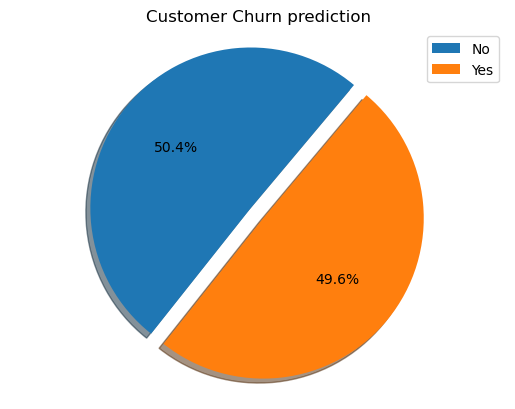

In [18]:
#create a piechart for the curn column
sizes=[50438,49562]
labels="No","Yes"

explode=(0,0.1)
fig1,ax1=plt.subplots()

ax1.pie(sizes,explode=explode,autopct="%1.1f%%",shadow=True,startangle=50)
ax1.axis("equal")
ax1.set_title("Customer Churn prediction")
ax1.legend(labels)
plt.show()




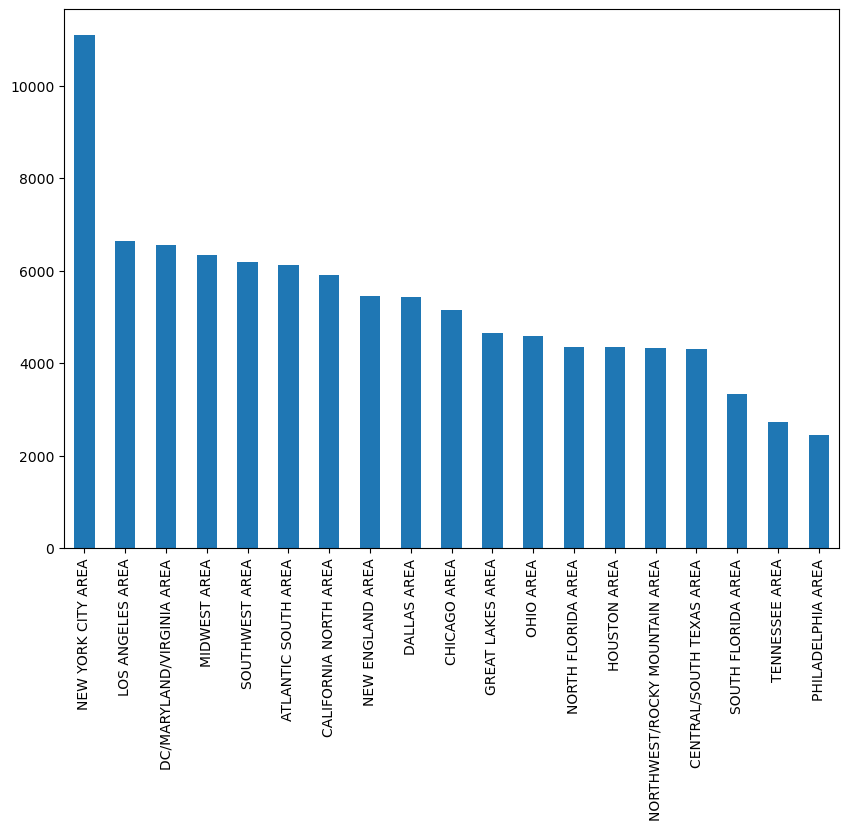

In [22]:
df["area"].value_counts().plot(kind="bar",
                              figsize=(10,7));

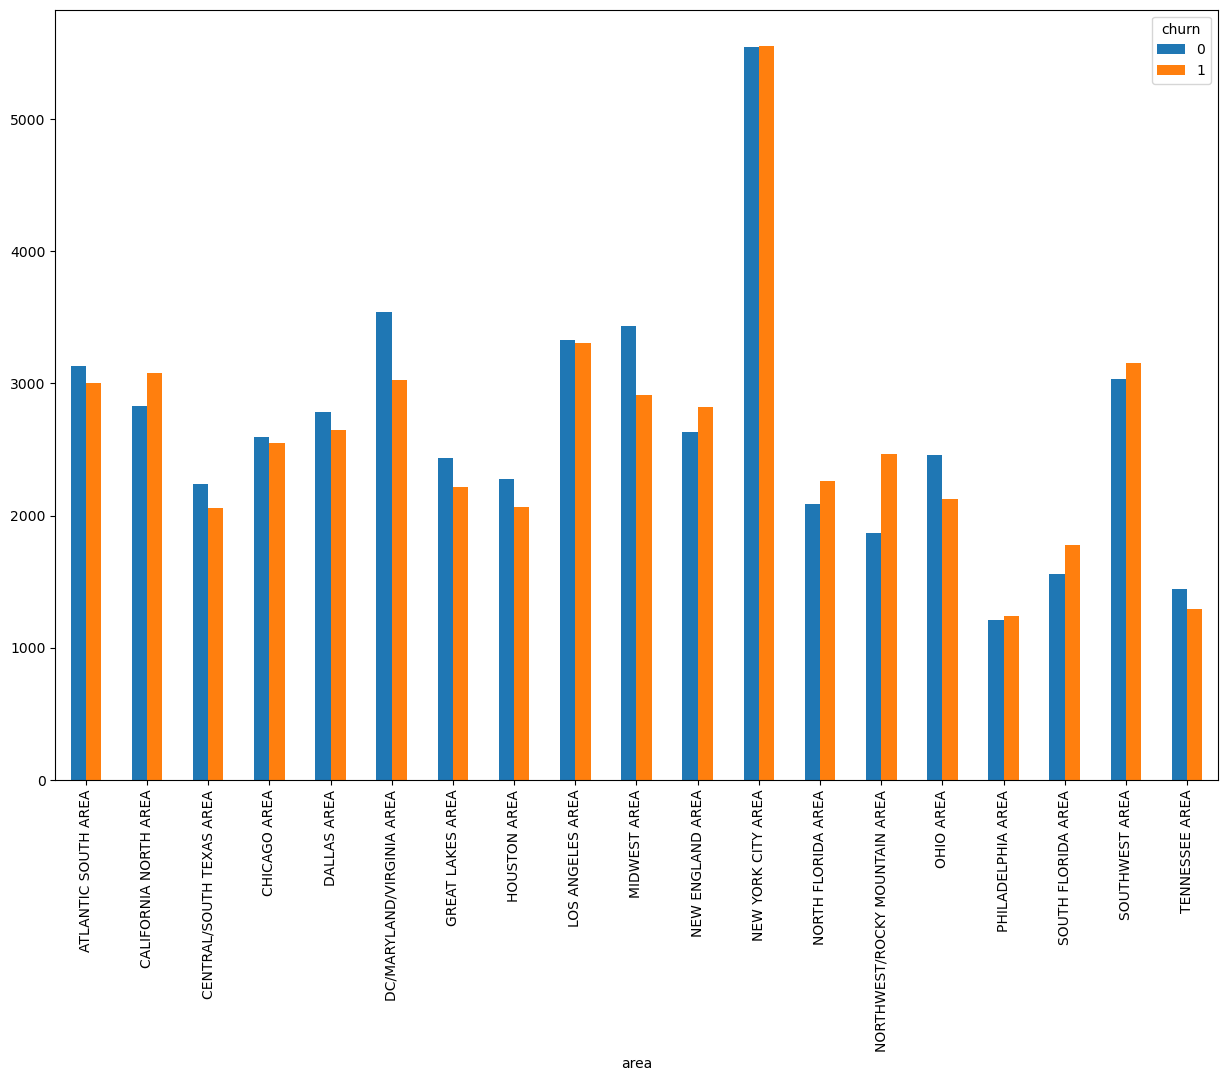

In [24]:
#check the relation between the area column and the amount of churn in the area

pd.crosstab(df["area"],df["churn"]).plot(kind="bar",
                                        figsize=(15,10));

In [25]:
df.columns

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months',
       'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls',
       'totmou', 'totrev', 'adjrev'

In [27]:
df["rev_Mean"].value_counts()

29.9900     2109
34.9900     1509
10.0000      953
30.0000      806
49.9900      792
            ... 
211.0300       1
9.7250         1
26.8750        1
75.0575        1
95.1700        1
Name: rev_Mean, Length: 37468, dtype: int64

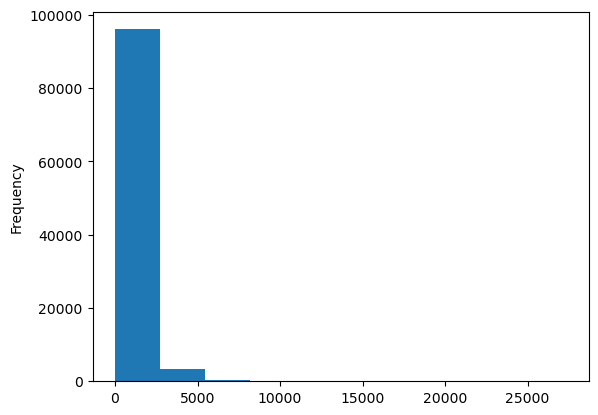

In [41]:
df["totrev"].plot(kind="hist");

Text(0.5, 1.0, 'churn versus income')

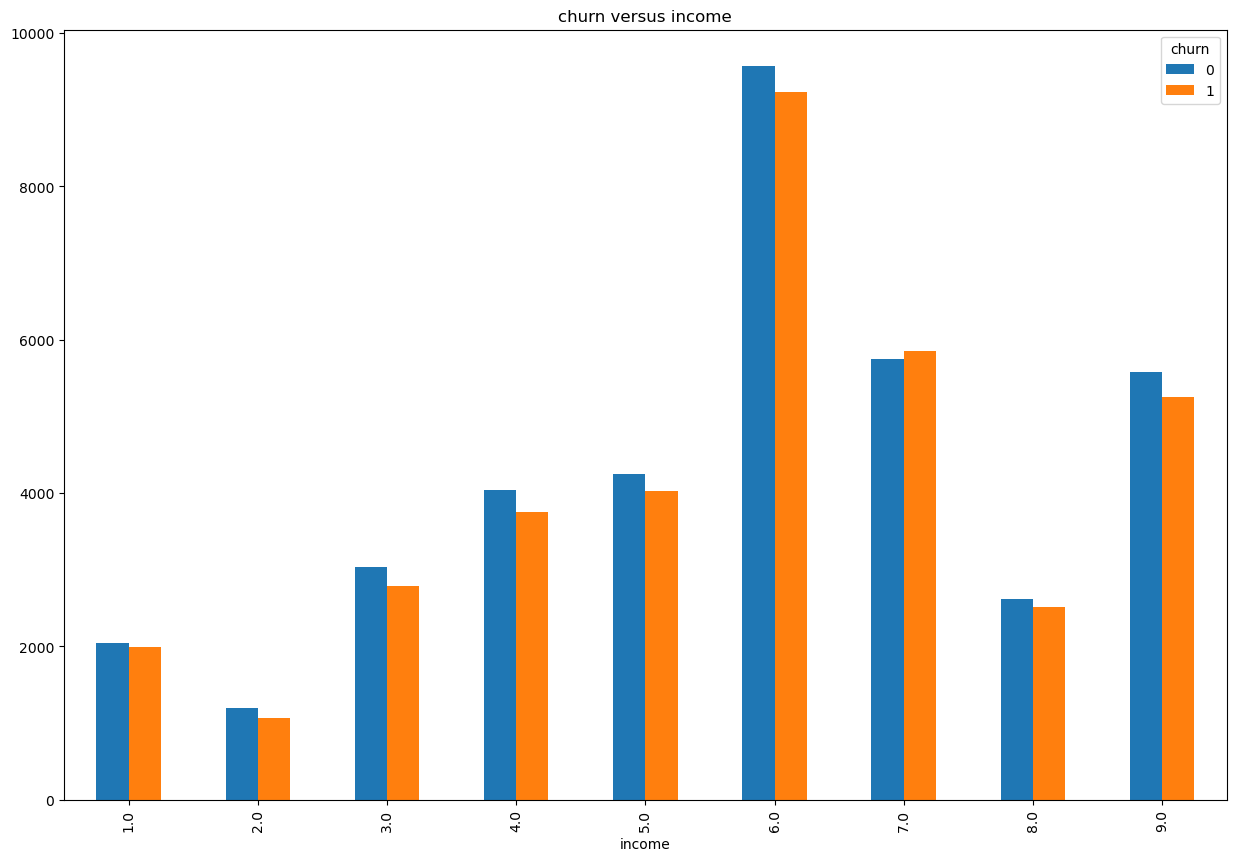

In [45]:
pd.crosstab(df["income"],df["churn"]).plot(kind="bar",
                                          figsize=(15,10));
plt.title("churn versus income")

Text(0.5, 1.0, 'Rental/Home own status vs churn')

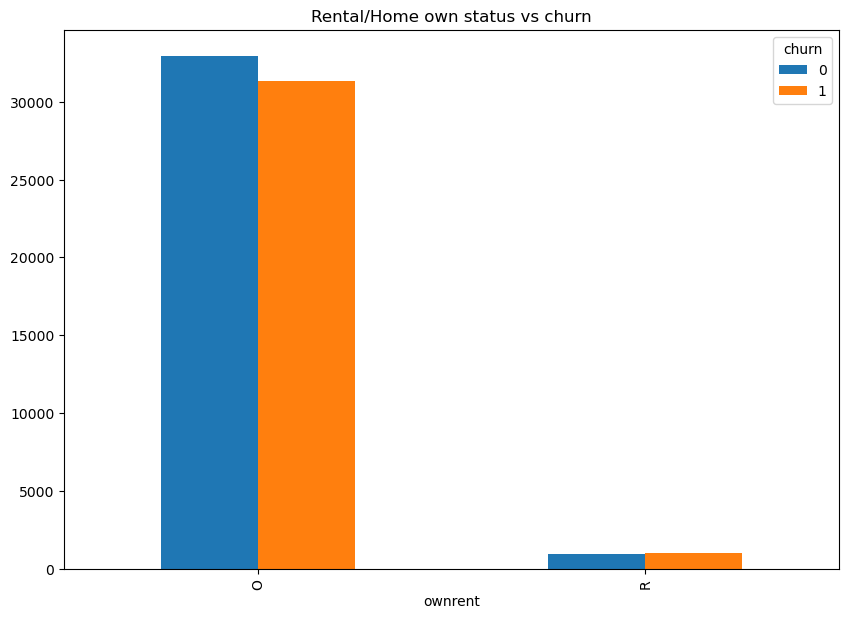

In [49]:
pd.crosstab(df["ownrent"],df["churn"]).plot(kind="bar",
                                           figsize=(10,7));
plt.title("Rental/Home own status vs churn")

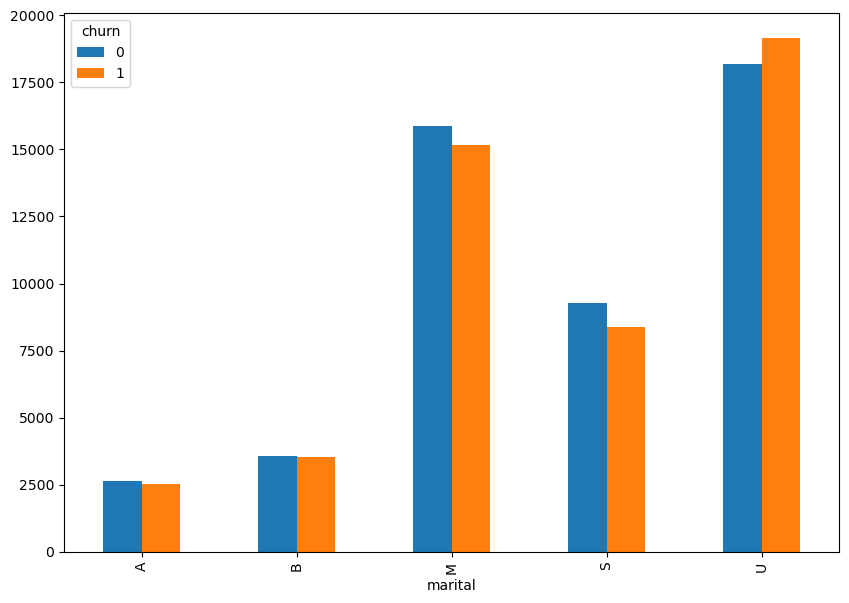

In [52]:
pd.crosstab(df["marital"],df["churn"]).plot(kind="bar",
                                           figsize=(10,7));

In [53]:
#check the correlation of the diffrent numeric values in the dataset
df.corr()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
rev_Mean,1.000000,0.706029,0.602148,0.403806,0.772117,0.776647,0.772159,0.152664,0.374718,0.075835,...,0.225320,-0.035863,-0.010322,-0.056251,-0.033564,-0.040699,0.001509,-0.038434,-0.213402,0.009748
mou_Mean,0.706029,1.000000,0.575567,0.394583,0.575611,0.541250,0.539811,0.090349,0.125442,-0.008211,...,0.286538,-0.054795,-0.027519,-0.063562,-0.023166,-0.093709,0.013006,-0.051355,-0.315322,0.097426
totmrc_Mean,0.602148,0.575567,1.000000,0.306966,0.200732,0.164401,0.163038,0.035428,0.046865,-0.020845,...,0.219285,-0.035703,-0.016609,-0.053149,-0.034945,-0.026211,0.004181,-0.034726,-0.247781,0.060932
da_Mean,0.403806,0.394583,0.306966,1.000000,0.304596,0.274344,0.274162,0.040290,0.044899,-0.021603,...,0.160514,-0.032306,-0.007566,-0.042996,-0.037116,0.032336,-0.000643,-0.021007,-0.120649,0.000398
ovrmou_Mean,0.772117,0.575611,0.200732,0.304596,1.000000,0.956056,0.953231,0.162933,0.040371,-0.011172,...,0.140901,-0.024408,-0.003892,-0.037157,-0.020575,-0.030198,-0.000350,-0.026663,-0.127763,0.010098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
income,-0.040699,-0.093709,-0.026211,0.032336,-0.030198,-0.038617,-0.037516,-0.015531,-0.008839,-0.008239,...,-0.043265,0.037975,0.086854,0.068491,0.089325,1.000000,0.069197,0.088237,0.105680,-0.074663
numbcars,0.001509,0.013006,0.004181,-0.000643,-0.000350,-0.000347,0.000074,-0.004351,-0.005464,0.000997,...,0.013237,0.027228,0.014937,0.113999,0.237031,0.069197,1.000000,0.025110,-0.019281,0.009586
forgntvl,-0.038434,-0.051355,-0.034726,-0.021007,-0.026663,-0.028010,-0.028211,-0.001937,-0.005337,0.005273,...,-0.010085,0.040533,0.046756,0.072458,0.112912,0.088237,0.025110,1.000000,0.046153,-0.038202
eqpdays,-0.213402,-0.315322,-0.247781,-0.120649,-0.127763,-0.135519,-0.132001,-0.052743,-0.022265,-0.007486,...,-0.380732,0.043237,0.030765,0.041334,0.011267,0.105680,-0.019281,0.046153,1.000000,-0.422278


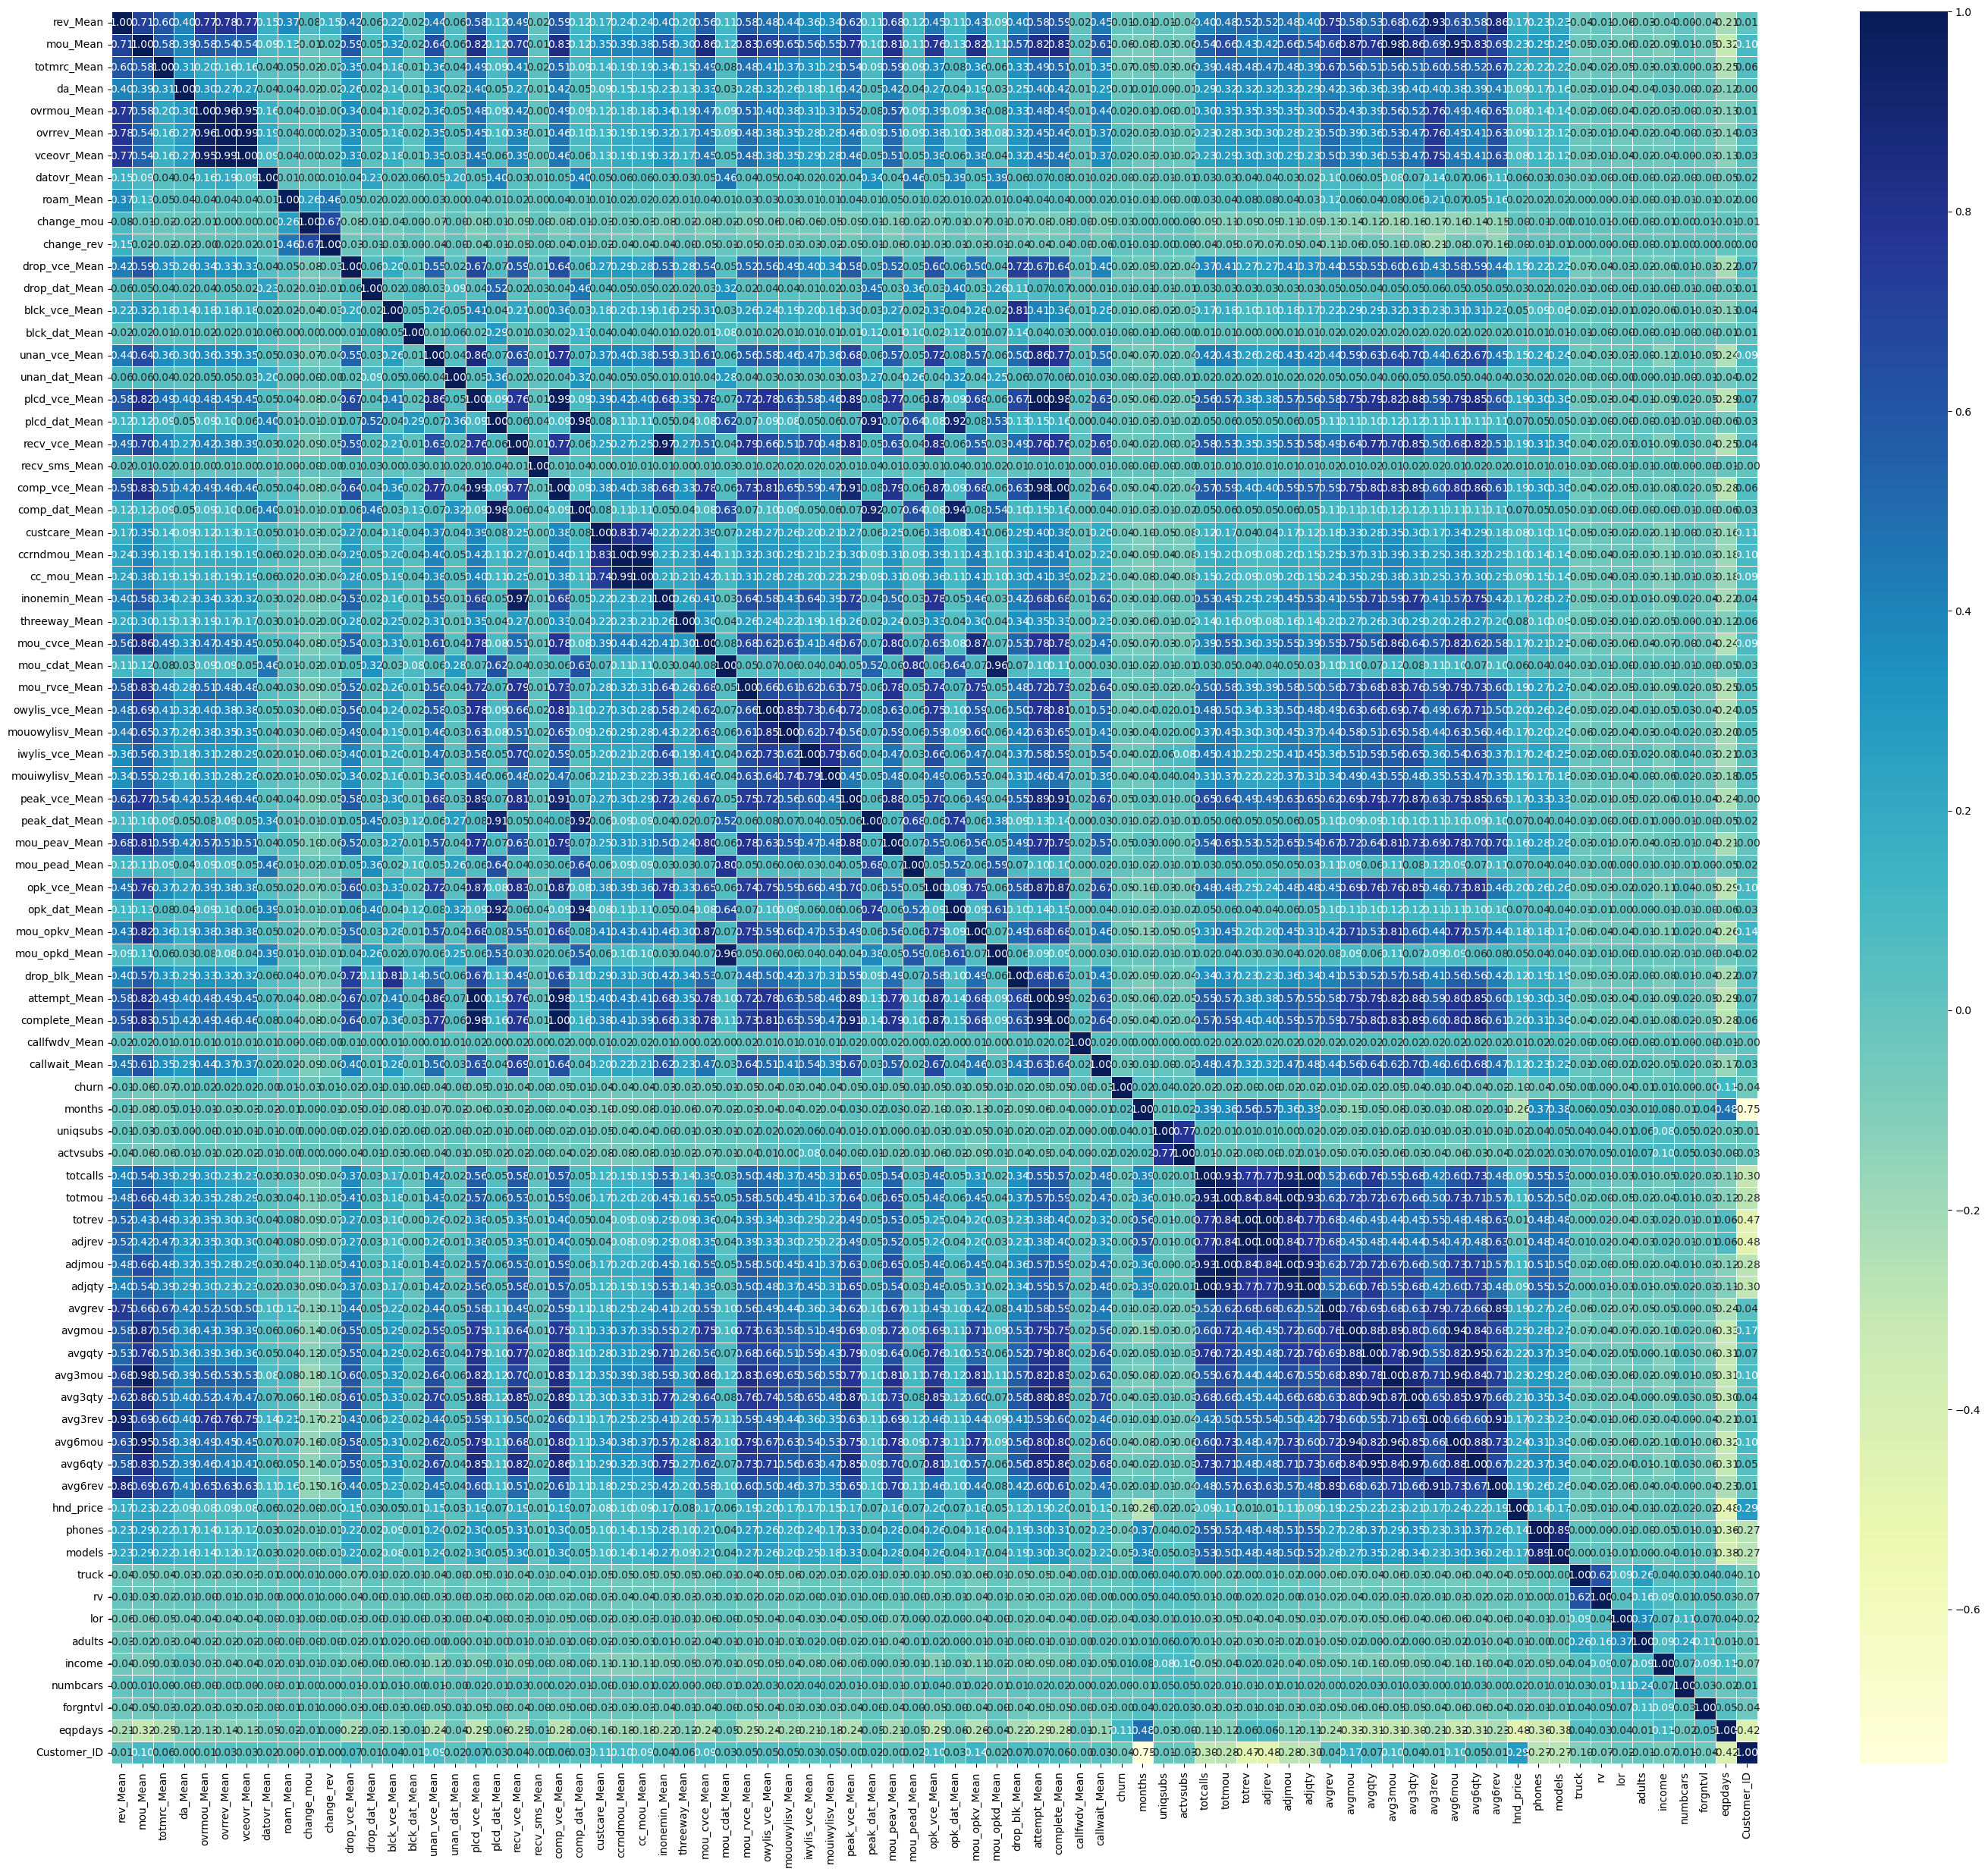

In [55]:
#make the correlation matrix more prettier
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(35,30))
ax=sns.heatmap(corr_matrix,
              annot=True,
              cmap="YlGnBu",
              linewidths=0.5,
              fmt=".2f");

### Preparing our data for modellling

Data preparation for modelling includes 3 major steps which are:

    1.Fill in the missing values 
    2.Ensure that our data is of numeric datatype
    3.Splitting the data into both the training and validation data
### We shall do each of the following in a sequential order but lets first fill the missing values 

In [56]:
df.isna().sum()


rev_Mean        357
mou_Mean        357
totmrc_Mean     357
da_Mean         357
ovrmou_Mean     357
               ... 
kid11_15       1732
kid16_17       1732
creditcd       1732
eqpdays           1
Customer_ID       0
Length: 100, dtype: int64

In [57]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

In [58]:
#check the numeric values in the dataset
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

rev_Mean
mou_Mean
totmrc_Mean
da_Mean
ovrmou_Mean
ovrrev_Mean
vceovr_Mean
datovr_Mean
roam_Mean
change_mou
change_rev
drop_vce_Mean
drop_dat_Mean
blck_vce_Mean
blck_dat_Mean
unan_vce_Mean
unan_dat_Mean
plcd_vce_Mean
plcd_dat_Mean
recv_vce_Mean
recv_sms_Mean
comp_vce_Mean
comp_dat_Mean
custcare_Mean
ccrndmou_Mean
cc_mou_Mean
inonemin_Mean
threeway_Mean
mou_cvce_Mean
mou_cdat_Mean
mou_rvce_Mean
owylis_vce_Mean
mouowylisv_Mean
iwylis_vce_Mean
mouiwylisv_Mean
peak_vce_Mean
peak_dat_Mean
mou_peav_Mean
mou_pead_Mean
opk_vce_Mean
opk_dat_Mean
mou_opkv_Mean
mou_opkd_Mean
drop_blk_Mean
attempt_Mean
complete_Mean
callfwdv_Mean
callwait_Mean
churn
months
uniqsubs
actvsubs
totcalls
totmou
totrev
adjrev
adjmou
adjqty
avgrev
avgmou
avgqty
avg3mou
avg3qty
avg3rev
avg6mou
avg6qty
avg6rev
hnd_price
phones
models
truck
rv
lor
adults
income
numbcars
forgntvl
eqpdays
Customer_ID


In [60]:
#check for object datatype or the string dtype columns

for label,content in df.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

new_cell
crclscod
asl_flag
prizm_social_one
area
dualband
refurb_new
hnd_webcap
ownrent
dwlltype
marital
infobase
HHstatin
dwllsize
ethnic
kid0_2
kid3_5
kid6_10
kid11_15
kid16_17
creditcd


In [61]:
#check which of the numeric columns have the missing values
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

rev_Mean
mou_Mean
totmrc_Mean
da_Mean
ovrmou_Mean
ovrrev_Mean
vceovr_Mean
datovr_Mean
roam_Mean
change_mou
change_rev
avg6mou
avg6qty
avg6rev
hnd_price
phones
models
truck
rv
lor
adults
income
numbcars
forgntvl
eqpdays


In [64]:
#check which of the object datatypes have the missing values
for label,content in df.items():
    if pd.api.types.is_object_dtype(content):
        if pd.isnull(content).sum():
            print(label)

prizm_social_one
area
dualband
refurb_new
hnd_webcap
ownrent
dwlltype
marital
infobase
HHstatin
dwllsize
ethnic
kid0_2
kid3_5
kid6_10
kid11_15
kid16_17
creditcd


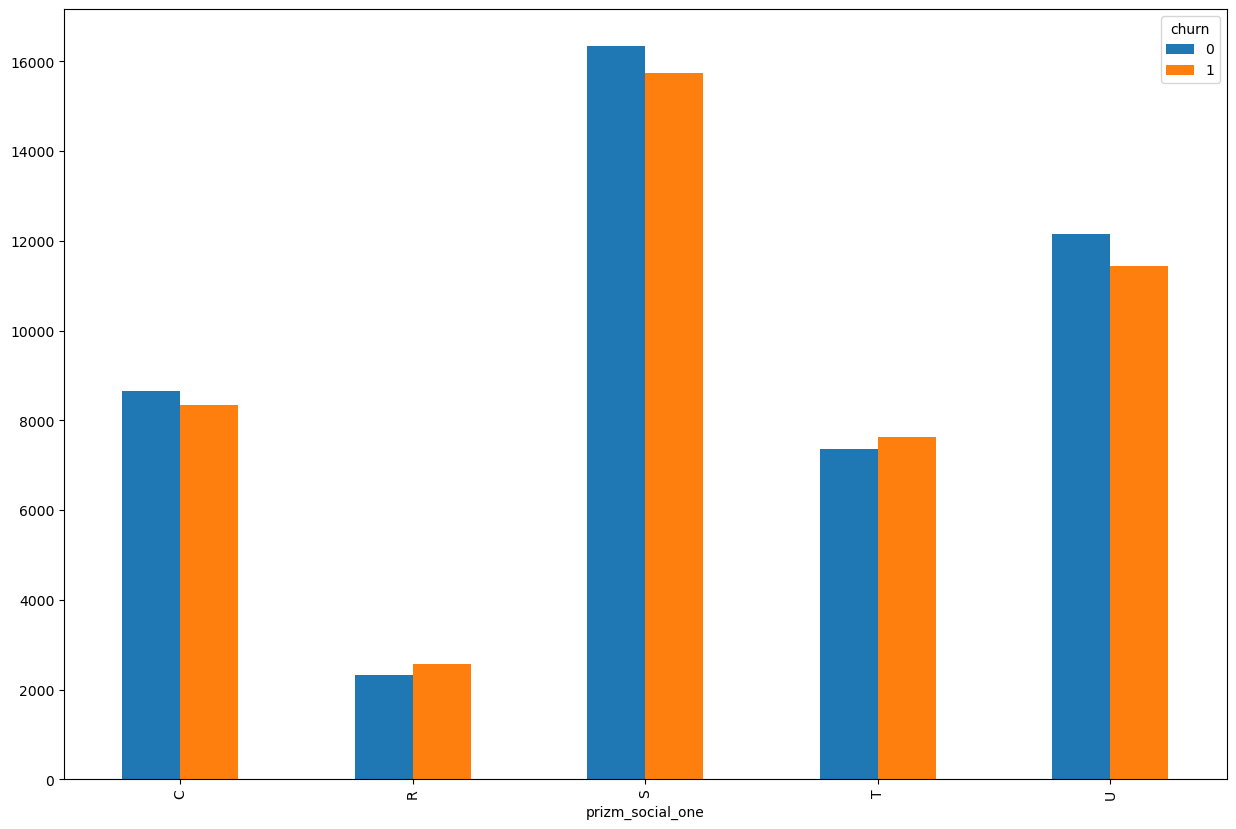

In [67]:
df["prizm_social_one"].value_counts()
pd.crosstab(df["prizm_social_one"],df["churn"]).plot(kind="bar",
                                                    figsize=(15,10));

In [68]:
#fill the numeric missing values with the median
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #add a binary column which tells the model whether the column had missing values before
            df[label+"_is_missing"]=pd.isna(content)
            #fill in the missing values with the median
            df[label]=content.fillna(content.median())

In [69]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

###  No more missing numerical values inthe dataset ...Lets do the same for the object columns 


In [70]:
df.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,phones_is_missing,models_is_missing,truck_is_missing,rv_is_missing,lor_is_missing,adults_is_missing,income_is_missing,numbcars_is_missing,forgntvl_is_missing,eqpdays_is_missing
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,False,False,False,False,False,False,False,False,False,False
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,False,False,False,False,False,False,False,False,False,False
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,False,False,False,False,False,False,False,False,False,False
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,False,False,False,False,False,False,False,False,False,False
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,False,False,False,False,False,False,False,False,False,False


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 125 entries, rev_Mean to eqpdays_is_missing
dtypes: bool(25), float64(69), int64(10), object(21)
memory usage: 78.7+ MB


In [72]:
#convert the object datatypes to numerical
for label,content in df.items():
    if pd.api.types.is_object_dtype(content):
        #Turn all the strings into categories 
        df[label]=content.astype("category").cat.as_ordered()

In [73]:
for label,content in df.items():
    if pd.api.types.is_categorical_dtype(content):
        print(label)

new_cell
crclscod
asl_flag
prizm_social_one
area
dualband
refurb_new
hnd_webcap
ownrent
dwlltype
marital
infobase
HHstatin
dwllsize
ethnic
kid0_2
kid3_5
kid6_10
kid11_15
kid16_17
creditcd


In [74]:
#convert the categorical values into integers and add +1 becaues pandas encodes missing categorical values as -1

for label,content in df.items():
    if pd.api.types.is_categorical_dtype(content):
        #add a binary column which indicates whether the column had missing values or not
        df[label+"is_missing"]=pd.isna(content)
#         convert the non_numeric columns to numerical
        df[label]=pd.Categorical(content).codes+1

In [75]:
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

In [76]:
#check the information about the columns for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 146 entries, rev_Mean to creditcdis_missing
dtypes: bool(46), float64(69), int64(10), int8(21)
memory usage: 66.7 MB


##  Modelling 

Its time that we now build a machine learning model since we have already formatted our data to be in the right format to pass into the model

We shall create 2 models:

    * RandomForestClassifier()
    * LogisticRegression()
    
We shall create a function to fit our models to the training data and check the append the scores to a dictionary

In [77]:
#import the models we are going to use
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression



In [78]:
#split te data into features and variables 
X=df.drop("churn",axis=1)
y=df["churn"]

In [79]:
X.shape,y.shape

((100000, 145), (100000,))

In [81]:
#split the data into training and test splits 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2,
                                              random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80000, 145), (20000, 145), (80000,), (20000,))

In [83]:
df.head().T

,0,1,2,3,4
rev_Mean,23.9975,57.4925,16.99,38.0,55.23
mou_Mean,219.25,482.75,10.25,7.5,570.5
totmrc_Mean,22.5,37.425,16.99,38.0,71.98
da_Mean,0.2475,0.2475,0.0,0.0,0.0
ovrmou_Mean,0.0,22.75,0.0,0.0,0.0
...,...,...,...,...,...
kid3_5is_missing,False,False,False,False,False
kid6_10is_missing,False,False,False,False,False
kid11_15is_missing,False,False,False,False,False
kid16_17is_missing,False,False,False,False,False


### Create a function to fit the model to the training data and append the scores to the `model_scores`dictionary

In [84]:
#create a dictionary of the models
models={"RandomForest":RandomForestClassifier(),
       "LinearModel":LogisticRegression()}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    This function fits and scores the model to the training data and appends the scores to the 
    model_scores dictionary
    
    Args:
    models:A dictionary of models to fit to the training data 
    X_train:Training features
    x_test:Testing features
    y_train:Training labels
    y_test:Testing labels
    """
    #create an empty dictionary to append the models scores
    model_scores={}
    
    #set the random seed for reproducability
    np.random.seed(42)
    
    #loop  through the dictionary to fit and score the models
    for name,model in models.items():
        #fit the models to the training data
        model.fit(X_train,y_train)
        
        #append the model scores to the dictionary
        model_scores[name]=model.score(X_test,y_test)
        
    return model_scores
    
    

In [85]:
model_scores=fit_and_score(models=models,
                          X_train=X_train,
                          X_test=X_test,
                          y_train=y_train,
                          y_test=y_test)
model_scores

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForest': 0.62655, 'LinearModel': 0.56635}

In [86]:
#instantiate the best perfoming model
model=RandomForestClassifier()


### Check the feature importances of the model
The feature importances of the model is the process of finding the most important features which were most important when it comes to predicting the target

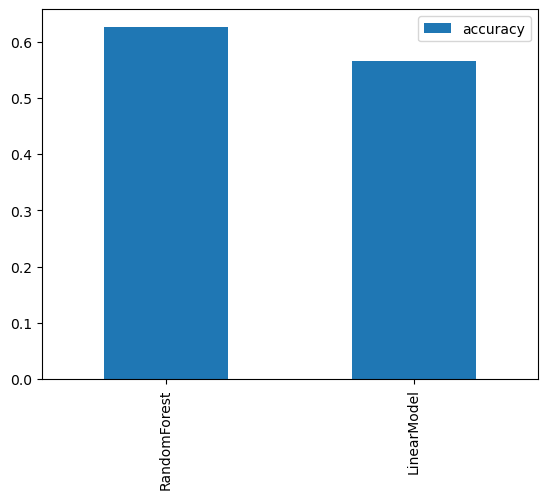

In [87]:
#best perfoming model
model_comparison=pd.DataFrame(model_scores,index=["accuracy"])
model_comparison.T.plot(kind="bar");

### Feature importances


In [89]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [90]:
model.feature_importances_

array([1.79908218e-02, 1.96501224e-02, 1.55568453e-02, 9.03286984e-03,
       1.13286267e-02, 1.15167607e-02, 1.08933400e-02, 3.01630539e-03,
       8.35772185e-03, 2.40891765e-02, 1.94124817e-02, 1.32997971e-02,
       5.86540394e-04, 1.11417856e-02, 3.27490476e-04, 1.49234974e-02,
       7.87949358e-04, 1.38188943e-02, 2.46092341e-03, 1.42830018e-02,
       3.64472737e-04, 1.36614038e-02, 2.12911424e-03, 7.35015222e-03,
       8.16488790e-03, 8.85900302e-03, 1.37003803e-02, 4.56937783e-03,
       1.66520945e-02, 2.83286078e-03, 1.55414635e-02, 1.42902764e-02,
       1.58757376e-02, 1.12616165e-02, 1.31678052e-02, 1.48991495e-02,
       1.61593043e-03, 1.64870601e-02, 2.05536773e-03, 1.46946096e-02,
       1.66755151e-03, 1.64278112e-02, 2.12478859e-03, 1.39792820e-02,
       1.35530693e-02, 1.39624808e-02, 1.78153772e-04, 7.26238810e-03,
       2.41073363e-02, 5.53687828e-03, 3.38333868e-03, 4.08114271e-03,
       9.98046407e-03, 2.17582753e-03, 1.75890198e-02, 1.76739699e-02,
      

In [96]:
#create a fucntion to plot the feature importances
def plot_features(columns,importances,n=50):
    df=(pd.DataFrame({"features":columns,
                     "feature_importances":importances}).
       sort_values("feature_importances",ascending=False).
       reset_index(drop=True))
    
    #plot the dataframe
    fig,ax=plt.subplots(figsize=(20,15))
    ax.barh(df["features"][:n],df["feature_importances"][:n])
    ax.set_ylabel("features")
    ax.set_xlabel("feature_importances")
    ax.invert_yaxis()

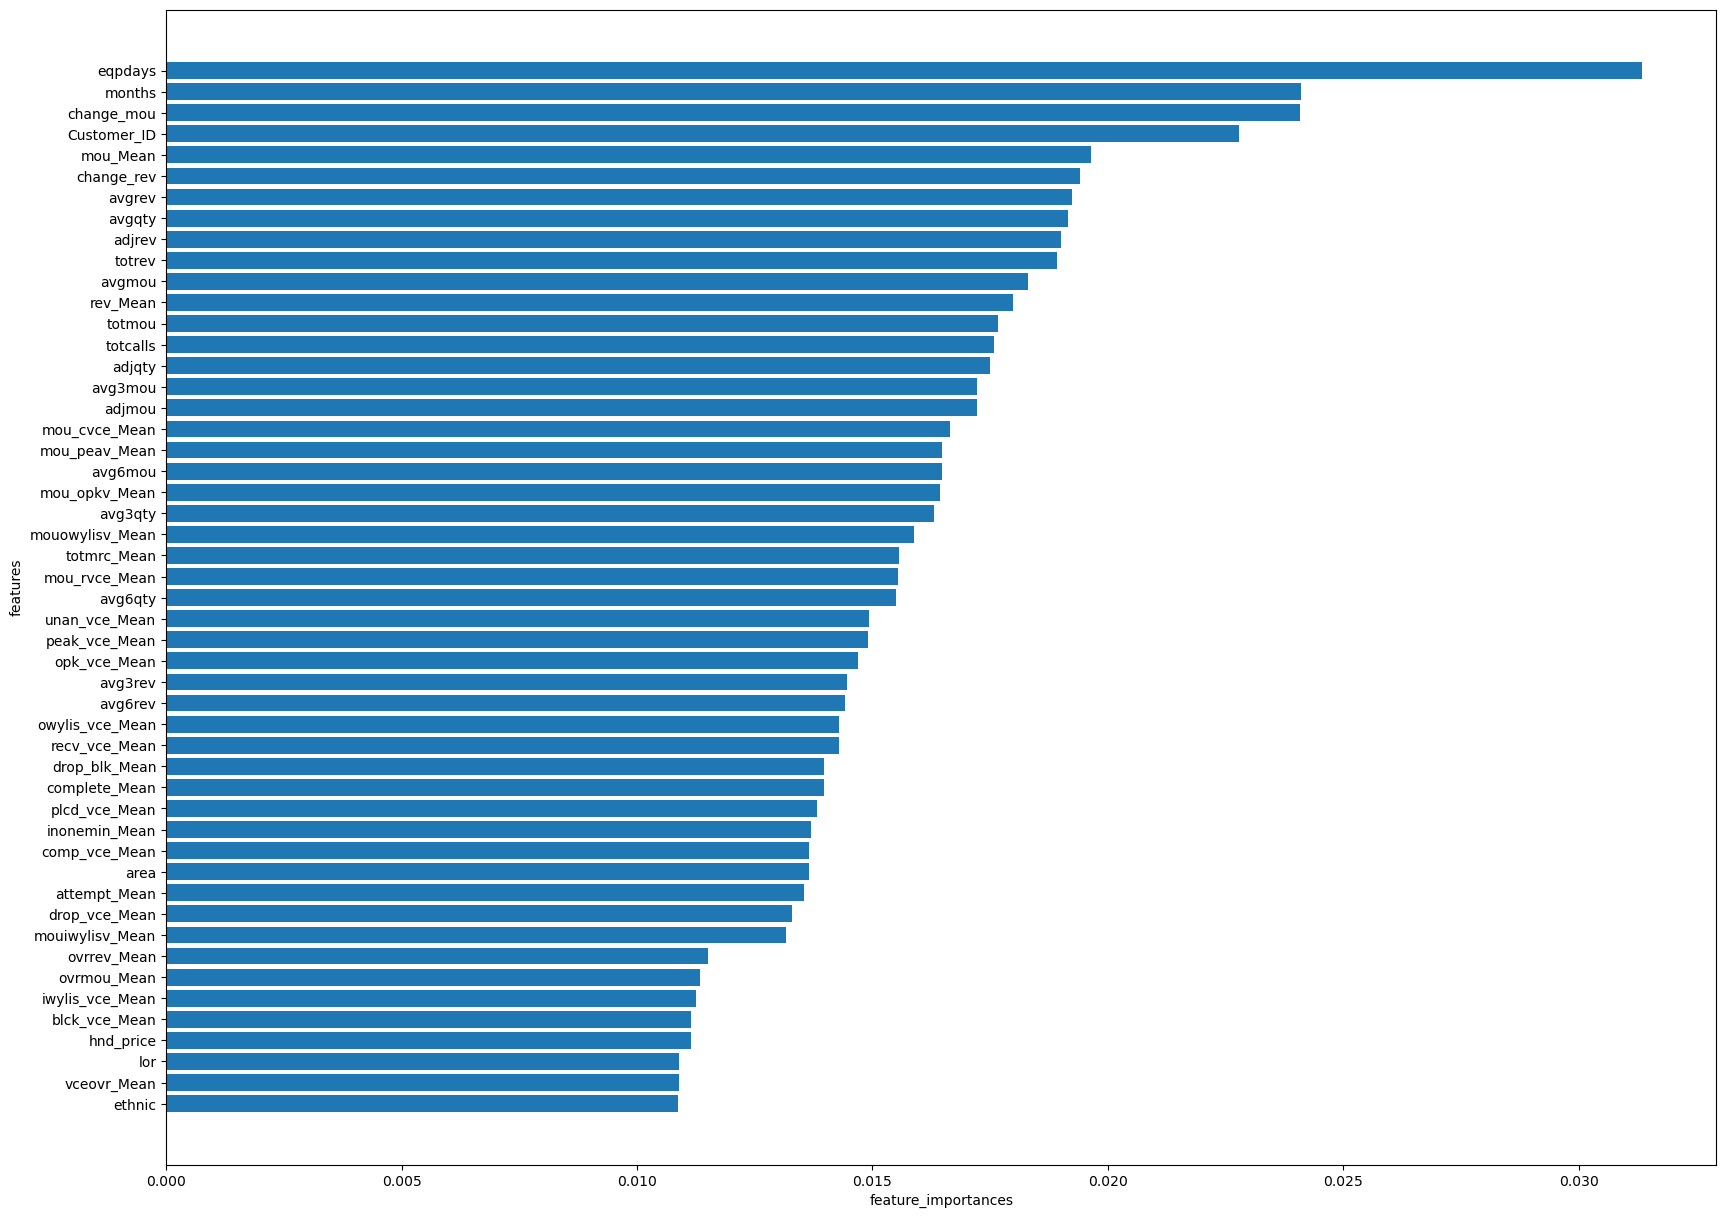

In [97]:
plot_features(X_train.columns,model.feature_importances_,n=50)